In [1]:
  #!/usr/bin/env python

try:
    import gi
    gi.require_version('NumCosmo', '1.0')
    gi.require_version('NumCosmoMath', '1.0')
except:
    pass
from astropy.io import fits
from astropy.table import Table
import math
import matplotlib.pyplot as plt
from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
import numpy as np
import sys
sys.path.insert(0,'../../scripts')

from scipy.stats import chi2
import corner
Ncm.cfg_init()
Ncm.cfg_set_log_handler (lambda msg: sys.stdout.write (msg) and sys.stdout.flush ())

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
from chainconsumer import ChainConsumer

In [2]:


def add_mcat(c, mcat, name):
    nwalkers = mcat.nchains ()
    m2lnL = mcat.get_m2lnp_var ()

    # Use nwalkers * 10 as burning length
    burn = nwalkers * burnin
    rows = np.array ([mcat.peek_row (i).dup_array () for i in range (burn, mcat.len ())])
    params = ["$" + mcat.col_symb (i) + "$" for i in range (mcat.ncols ())]

    posterior = -0.5 * rows[:,m2lnL]

    rows   = np.delete (rows,   m2lnL, 1)
    params = np.delete (params, m2lnL, 0)

    indices = [0,1,2,3]

    rows   = rows[:,indices]
    params = params[indices]

    c.add_chain(rows, posterior = posterior, parameters=list(params), name=name, plot_point = True)

In [3]:
burnin  = 50

parameters = [[0.8,4.5, 0.0, 2.560352988400761] , [0.8,4.5,-4.0, 3.139799921784934] , [0.8,2.5,0.0,0.9419012265745043]  , [0.8,2.5,-4.0,1.15506784061638] , [0.2,4.5,-4.0,2.7559040762338385]  , [0.2,2.5,-4.0,1.0138404514870045]]
burnins = [[72,80], [56,80], [144,72], [64,64], [64,88], [152,160]]



for i in  range(len(parameters)-1):
    mcat_mcmc = Ncm.MSetCatalog.new_from_file_ro ("mcmc_%.2f,%.2f,%.2f.fits" % (parameters[i][2],parameters[i][0],parameters[i][1]), burnins[i][0] * 500)
    mcat_mcmc_correct = Ncm.MSetCatalog.new_from_file_ro ("mcmc_%.2f,%.2f,%.2f.fits" % (parameters[i][2],parameters[i][0],parameters[i][1]), burnins[i][1] * 500)

    consumer = ChainConsumer()

    add_mcat (consumer, mcat_mcmc, "Incorrect")
    add_mcat (consumer, mcat_mcmc_correct, "Correct")

    consumer.configure (kde = True, label_font_size=11, cloud=True, sigma2d=True, sigmas = [1, 2, 3], spacing = 0.0, tick_font_size=11, usetex=False, shade = True)

    fig = consumer.plotter.plot(truth = [parameters[i][3],parameters[i][0], parameters[i][2],parameters[i][1]])

    fig.set_size_inches(12, 12)
    fig.show()                                                               
                                                                    


TypeError: unsupported operand type(s) for -: 'list' and 'int'

/tmp/ipykernel_15330/2936553196.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


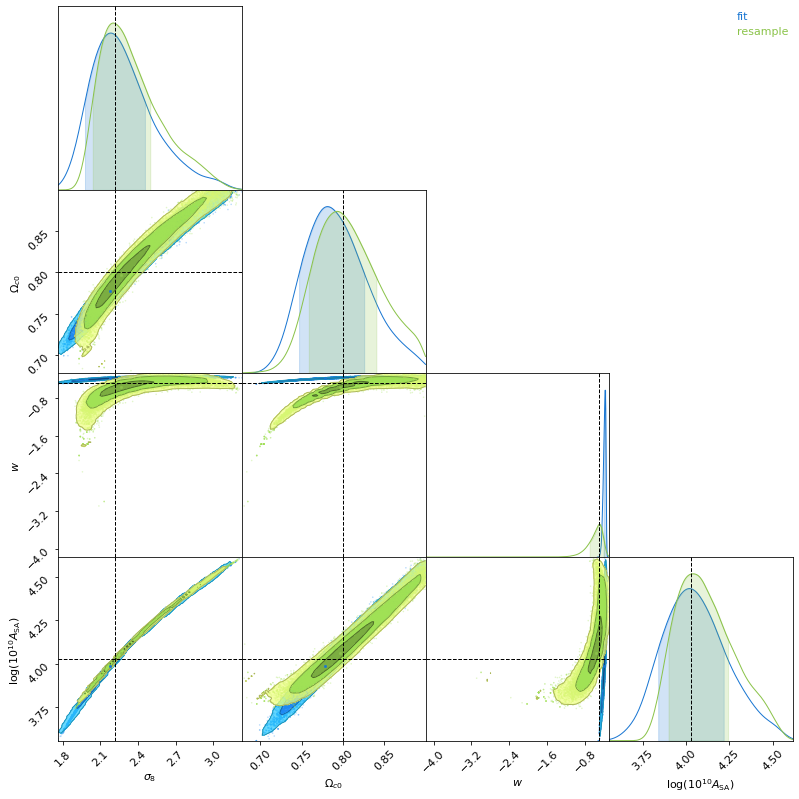

In [ ]:
burnin  = 50
mcat_mcmc_fullsky_sanity_resample = Ncm.MSetCatalog.new_from_file_ro ("mcmc_sanity_resample_resample.fits", 30 * 500)
mcat_mcmc_fullsky_sanity_fit = Ncm.MSetCatalog.new_from_file_ro ("mcmc_sanity_resample_fit.fits", 135 * 500)


consumer = ChainConsumer()

add_mcat (consumer, mcat_mcmc_fullsky_sanity_fit, "fit")
add_mcat (consumer, mcat_mcmc_fullsky_sanity_resample, "resample")

consumer.configure (kde = True, label_font_size=11, cloud=True, sigma2d=True, sigmas = [1, 2, 3], spacing = 0.0, tick_font_size=11, usetex=False, shade = True)

fig = consumer.plotter.plot(truth = [2.2131505482230454,0.8, -0.5,4.027449698161606])

fig.set_size_inches(12, 12)
fig.show()